## Final Project Report - Group 25 

##### **Group Members:** 
##### Lauryn Li 
##### Assel Jolaman 
##### Poj Taweepolcharoen 
##### Mustafa Tiritoglu

### Introduction 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In an attempt to learn more about how people play games, a research group at UBC has been hosting a Minecraft server and having research participants play on it while recording information about both their demographic, as well as their activity on the server. In regards to this study, one major question the researchers have encountered is how to best specify their recruitment efforts such that they can target the potential subjects who will contribute the most data to their experiment. This is because as with any scientific experiment the resources available to the researchers are limited, and as such they can only recruit a finite amount of subjects for their study. There is thus an incentive for the researchers to seek to identify the traits that are most strongly correlated to the highest time spent playing on the server, based on a statistical analysis of the data collected on the subject’s demographic information. They can then use this information to be more specific in their future recruitment efforts, and hopefully improve the size of their collected data by targeting a certain type of research subject.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will be using the players.csv dataset to help us predict if there is a relationship between the player’s age and playing time. This data set includes a list of all the minecraft players, including both quantitative or qualitative data about each player that makes them unique. It includes 196 observations and 7 variables that include experience, subscribe, hashedemail, played_hours, name and Age. Looking at the data set from a glance, we noticed some issues that made it hard to understand, which could potentially lead to uncertainty in our results and predictions. The first issue is that the “Experience” column seems ambiguous as we don’t know how this was assigned to each player. For example, there are some players with 50+ hours of playing time but are only assigned as “amateur”, whereas other players with less than 50 hours of playing time are assigned as “pro”. Therefore it is unclear whether or not the experience of the player contributes to the amount of playing time and if this variable would be a good predictor. Another issue is that the “age” column is missing some values, which could lead to an incomplete analysis and potentially skew the data.

#### players.csv Dataset Variables 

| Name of Variable |      Type    |               Description            |
| ---------------- | ------------ | ------------------------------------ | 
|    experience    |  Categorical | Experience level of the player  |
|    subscribe     |  Categorical |             If the player is subscribed to a game-related newsletter                | 
|    hashedEmail   |  Categorical | Player ID                            |
|    played_hours  | Quantitative |Hours played in Minecraft             |
|       name       |  Categorical | Name of Player                       |
|      gender      |  Categorical | Gender identity of the player |
|       Age        | Quantitative | Age of Player 



### Methods & Results 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
sessions_url <- "https://raw.github.students.cs.ubc.ca/assel17/data/main/sessions.csv?token=GHSAT0AAAAAAAAAIL22VPRBEUWNDNO3ZR5OZ7ZSPYA"
sessions <- read_csv(sessions_url)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
players_url <- "https://raw.github.students.cs.ubc.ca/assel17/data/main/players.csv?token=GHSAT0AAAAAAAAAIL222LIKC73UMFIKZLZOZ7ZSPIQ"

players <- read_csv(players_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# mean values for each quantitative variables (players_hours, Age)

mean_played_hours <- mean(players$played_hours, na.rm = TRUE)
mean_age <- mean(players$Age, na.rm = TRUE)

mean_table <- data.frame(
  metric = c("mean played hours", "mean age"),
  mean_value = c(mean_played_hours, mean_age))

head(players, 5)
mean_table

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21


metric,mean_value
<chr>,<dbl>
mean played hours,5.845918
mean age,20.520619


In [5]:
players <- players |>
    select(Age, played_hours) |> 
    filter(!is.na(Age))

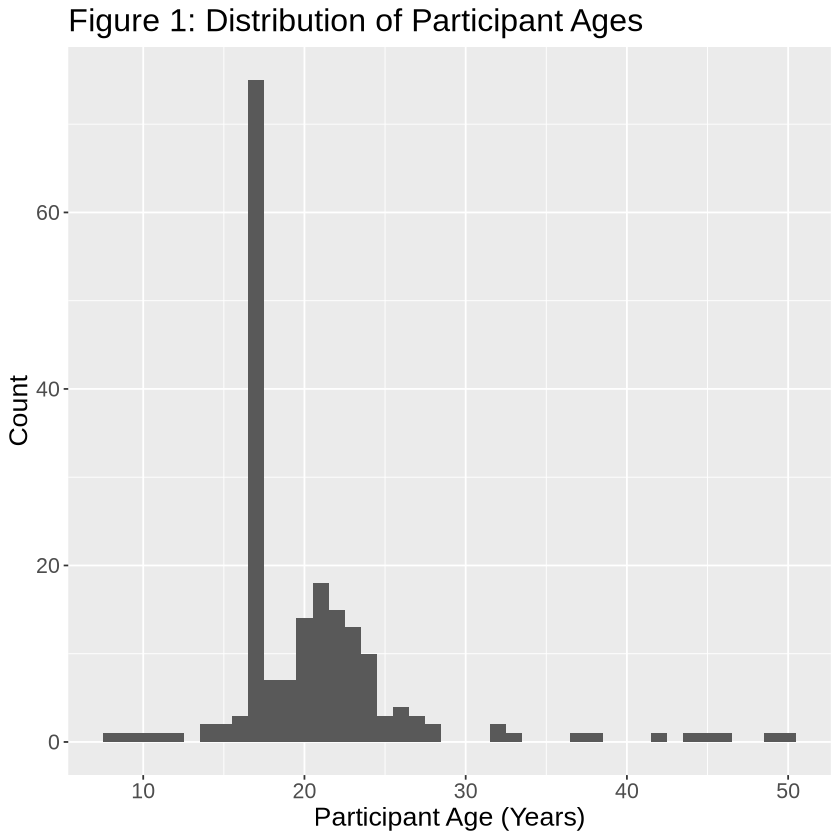

In [11]:
histogram_age <- ggplot(players, aes(x = Age)) +
                    geom_histogram(binwidth = 1) +
                    xlab("Participant Age (Years)") +
                    ylab("Count") +
                    ggtitle("Figure 1: Distribution of Participant Ages") +
                    theme(text = element_text(size = 16))
histogram_age

This plot shows a histogram of the age of participants in years. We can see that the vast majority of participants are between the ages of 15 and 25 with a very large peak at 17 years though the mean age is actually ~20.5 years. The data is fairly spread with a long tail on the right side as there are a few participants very far from the mean value, at the higher ages of 40-50 years. 

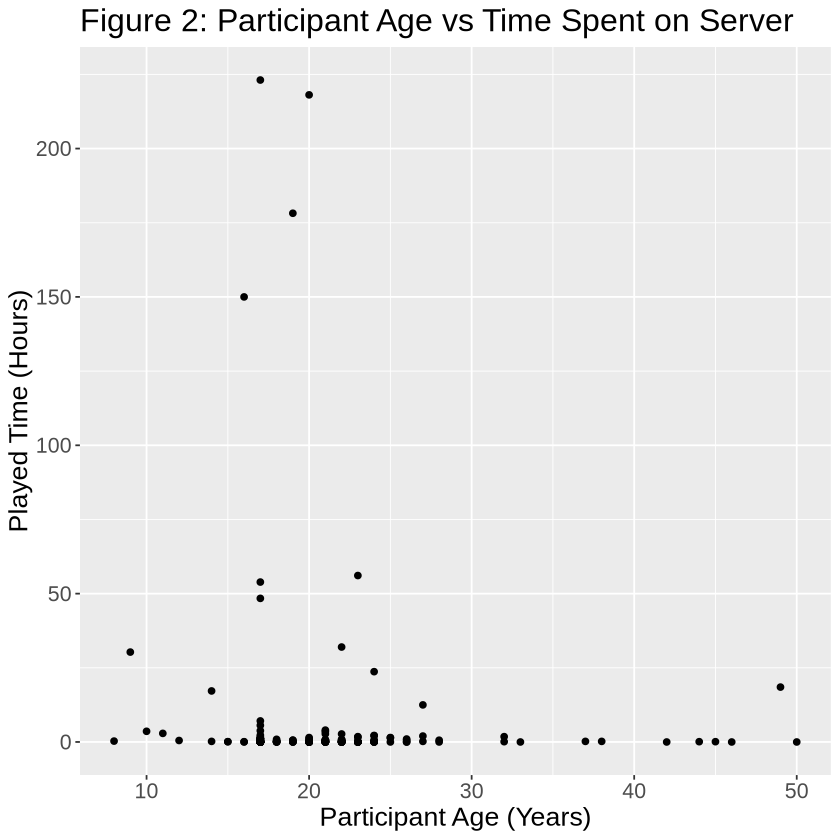

In [14]:
plot_age <- players |> 
    ggplot(aes(x = Age, y = played_hours)) +
    geom_point() + 
    labs(x = "Participant Age (Years)", y = "Played Time (Hours)") +
    ggtitle("Figure 2: Participant Age vs Time Spent on Server") +
    theme(text = element_text(size = 16))
plot_age

This plot displays a distribution of the participant's ages compared to the time they spent playing on the server. It shows that most participants of all ages spent very little time on the server either spending 0 or only a few hours on the server. There were some individuals who spent a moderate amount of time on the server with play times of around 10-50 hours, these individuals seemed to be fairly evenly distributed throughout the range of participant ages. Finally, there were 4 individuals who spent a much longer time on the server, playing for over 150 hours. These individuals were all between the ages of 15-20 years.

In [8]:
players_split <- initial_split(players, prop = 0.75)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [9]:
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

players_recipe <- recipe(played_hours ~ Age, data = players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())

players_vfold <- vfold_cv(players_training, v = 5)

players_wkflw <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec)

In [ ]:
gridvals <- tibble(neighbors = seq(from = 1, to = 20, by = 1))

players_results <- players_wkflw |>
  tune_grid(resamples = players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

players_results

In [ ]:
players_min <- players_results |>
  filter(mean == min(mean))

players_min

In [ ]:
kmin <- players_min |> pull(neighbors)

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
  set_engine("kknn") |>
  set_mode("regression")

players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_training)

players_summary <- players_fit |>
  predict(players_testing) |>
  bind_cols(players_testing) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')

players_summary

In [ ]:
age_prediction_grid <- tibble(
    Age = seq(
        from = players |> select(Age) |> min(),
        to = players |> select(Age) |> max(),
        by = 1
    )
)

players_preds <- players_fit |>
  predict(age_prediction_grid) |>
  bind_cols(age_prediction_grid)

plot_final <- ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = players_preds,
            mapping = aes(x = Age, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Age") +
  ylab("Played hours") +
  ggtitle(paste0("K = ", kmin)) +
  theme(text = element_text(size = 12))

plot_final

### Discussion